AUDIO ENGINEERING BASICS

LOAD AUDIO + INSPECT BASICS

In [16]:
from pydub import AudioSegment
import os

In [17]:
audio = AudioSegment.from_file("song.mp3")

In [18]:
print("Duration (ms):", len(audio))
print("Channels:", audio.channels)
print("Frame Rate:", audio.frame_rate)
print("Sample Width (bytes):", audio.sample_width)
print("dBFS (average loudness):", audio.dBFS)

Duration (ms): 465025
Channels: 2
Frame Rate: 48000
Sample Width (bytes): 2
dBFS (average loudness): -14.95252873904402


In [19]:
#Slicing Audio (Show output sizes)

first_5_sec=audio[:5000]
next_5_sec=audio[5000:10000]

print("First 5 sec:", len(first_5_sec))
print("Next 5 secs",len(next_5_sec))

First 5 sec: 5000
Next 5 secs 5000


In [20]:
#Fad In and Fad Out demo

fade_in_clip=audio[:5000].fade_in(3000)
fade_out_clip=audio[:5000].fade_out(3000)


print("Fade_In:", fade_in_clip)
print("Fade+_Out",fade_out_clip)


Fade_In: <pydub.audio_segment.AudioSegment object at 0x000002B7DDAA09B0>
Fade+_Out <pydub.audio_segment.AudioSegment object at 0x000002B7E56403B0>


In [21]:
#Concatenation Demo (how to join two songs)

combined=first_5_sec+next_5_sec
print("Length of Combined",len(combined))


Length of Combined 10000


In [22]:
#SIMPLE WAVEFORM PLOT USING LIBROSA AND MATPLOTLIB

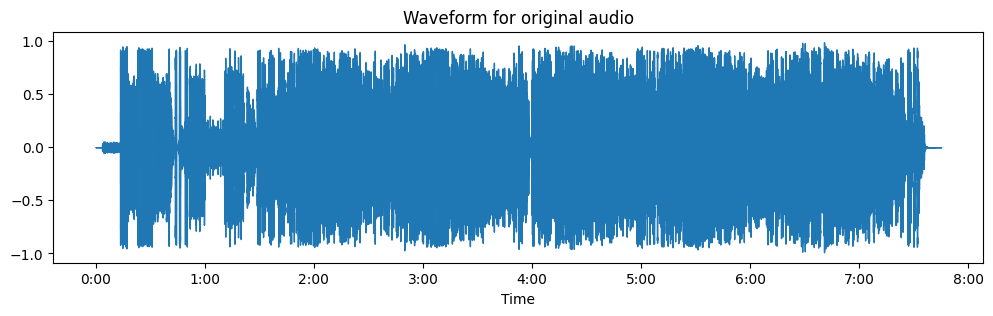

In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr=librosa.load("song.mp3", sr=None)

plt.figure(figsize=(12,3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform for original audio")
plt.show()

In [24]:
#VISULIZE FADE-IN AND FADE-OUT

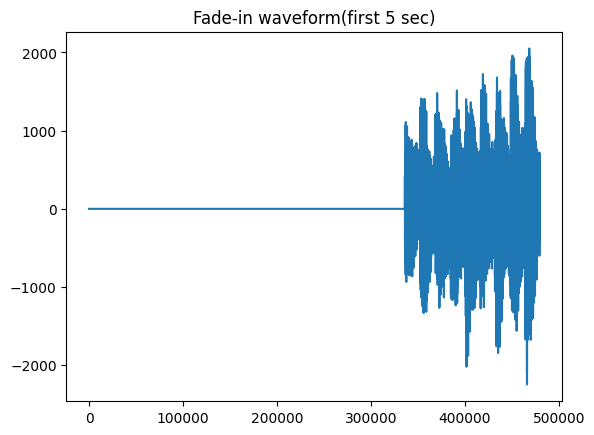

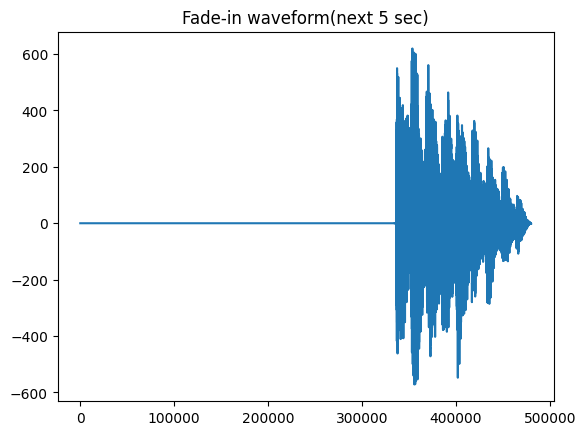

In [25]:
fade_in_audio=fade_in_clip.get_array_of_samples()
fade_out_audio=fade_out_clip.get_array_of_samples()

plt.Figure(figsize=(12,3))
plt.plot(fade_in_audio)
plt.title("Fade-in waveform(first 5 sec)")
plt.show()

plt.Figure(figsize=(12,3))
plt.plot(fade_out_audio)
plt.title("Fade-in waveform(next 5 sec)")
plt.show()

In [26]:
#MIXTAPE LOGIC

In [30]:
import os
from pydub import AudioSegment
from tqdm import tqdm  # Standard library for progress bars

def smooth_fade_mixtape(folder, output="output/mixtape1.mp3", transition_ms=6000):
    # Setup and Validation
    if not os.path.exists(folder):
        print(f"Error: Input folder '{folder}' not found.")
        return

    output_dir = os.path.dirname(output)
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)

    files = [f for f in os.listdir(folder) if f.endswith((".mp3", ".wav"))]
    
    if not files:
        print("No audio files found.")
        return

    mixtape = None

    # Wrap the loop in tqdm for a visual progress bar
    # 'desc' provides a label, 'unit' defines what is being counted
    for file in tqdm(files, desc="Building Mixtape", unit="song"):
        file_path = os.path.join(folder, file)
        
        song = AudioSegment.from_file(file_path)
        song = song.set_channels(2).set_frame_rate(44100)

        if mixtape is None:
            mixtape = song
        else:
            overlap = min(transition_ms, len(song), len(mixtape))

            # Apply filters and fades
            outgoing = mixtape[-overlap:].fade_out(overlap).low_pass_filter(4000)
            incoming = song[:overlap].fade_in(overlap).low_pass_filter(4000)

            transition = outgoing.overlay(incoming)
            mixtape = mixtape[:-overlap] + transition + song[overlap:]

    # Final Export (Fixed the format string typo)
    print("\nExporting final file... (this may take a minute)")
    mixtape.export(output, format="mp3")
    print(f"✅ Finished! Saved to: {output}")

# Run the function
path = r"E:\2026\Projects\Automated YouTube Mixtape Creation with Python\YT_Mixtape_Project\mixtape"
smooth_fade_mixtape(path)

Building Mixtape: 100%|██████████| 5/5 [00:12<00:00,  2.44s/song]



Exporting final file... (this may take a minute)
✅ Finished! Saved to: output/mixtape1.mp3


YOUTUBE DESCRIPTION GENERATOR